# CO2 Capacity Analysis (Updated Workflow)

## 1. Load and Filter Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import numpy as np

# Load the dataset
data = pd.read_excel('1-s2.0-S2213343723014719-mmc3.xlsx')

# Columns to keep
columns_to_keep = [
    'Symmetry', 'Cell Density [g/cm^3]', 'Cell Volume []', 
    'Pore Diameter [Å]', 'Porosity [-]', 'Pressure [bar]', 
    'Temperature [°C]', 'CO2 Partial Pressure [bar]', 
    'CO2 Adsorption Capacity [mmol/g]'
]

# Filter the dataset
data_filtered = data[columns_to_keep]

# Display the filtered dataset
data_filtered.head()


C:\Users\HP\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Symmetry,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar],CO2 Adsorption Capacity [mmol/g]
0,Pm-3m,1.85,3640.89,6.80,0.64,1,25,0.15,0.727365
1,C2/c,1.27,10127.90,4.62,0.55,1,25,0.15,0.672152
2,Pccn,1.44,4703.28,3.88,0.56,1,25,0.15,1.041453
3,Pccn,1.28,3191.38,6.10,0.51,1,25,0.15,0.391099
4,P21/c,2.82,3885.79,6.02,0.55,1,25,0.15,0.275758


## 2. Remove Outliers

In [2]:

# Define a function to remove outliers using the interquartile range (IQR)
def remove_outliers(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the filtered dataset
X = remove_outliers(data_filtered)

# Display the dataset after outlier removal
X.describe()


,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar],CO2 Adsorption Capacity [mmol/g]
count,2496.000000,2496.000000,2496.000000,2496.000000,2496.0,2496.0,2496.0,2496.000000
mean,1.310188,5469.153578,5.116627,0.550409,1.0,25.0,0.0,1.008652
std,0.315735,4218.171271,1.182326,0.088776,0.0,0.0,0.0,0.658973
min,0.380000,369.680000,3.750000,0.320000,1.0,25.0,0.0,0.015415
25%,1.100000,2420.222500,4.170000,0.480000,1.0,25.0,0.0,0.483599
50%,1.300000,3968.760000,4.775000,0.540000,1.0,25.0,0.0,0.883190
75%,1.510000,7195.677500,5.760000,0.610000,1.0,25.0,0.0,1.414042
max,2.230000,19328.760000,8.860000,0.790000,1.0,25.0,0.0,3.010813


## 3. Visualize Features with Histograms and Distributions

C:\Users\HP\AppData\Local\Temp\ipykernel_8488\830920527.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)


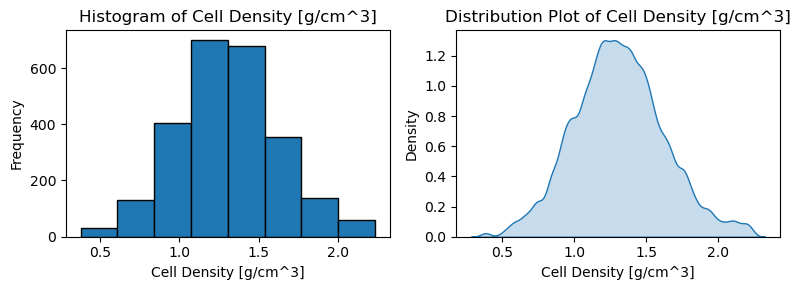

C:\Users\HP\AppData\Local\Temp\ipykernel_8488\830920527.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)


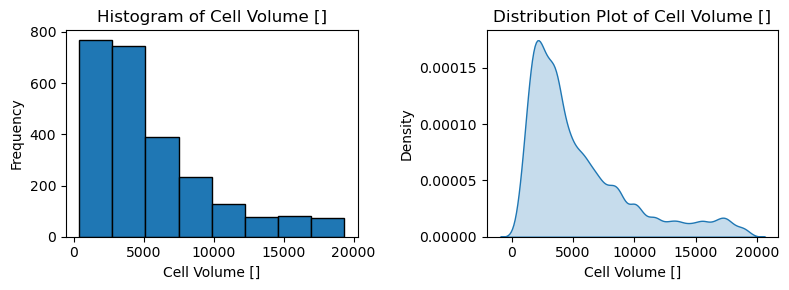

C:\Users\HP\AppData\Local\Temp\ipykernel_8488\830920527.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)


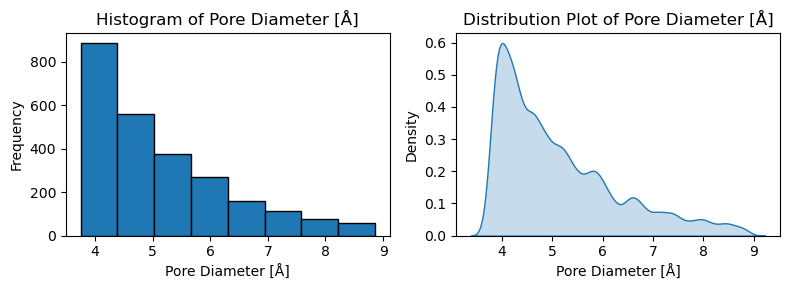

C:\Users\HP\AppData\Local\Temp\ipykernel_8488\830920527.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)


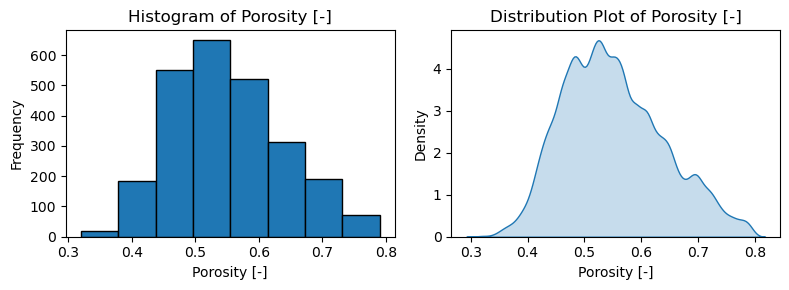

C:\Users\HP\AppData\Local\Temp\ipykernel_8488\830920527.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)
C:\Users\HP\AppData\Local\Temp\ipykernel_8488\830920527.py:28: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)


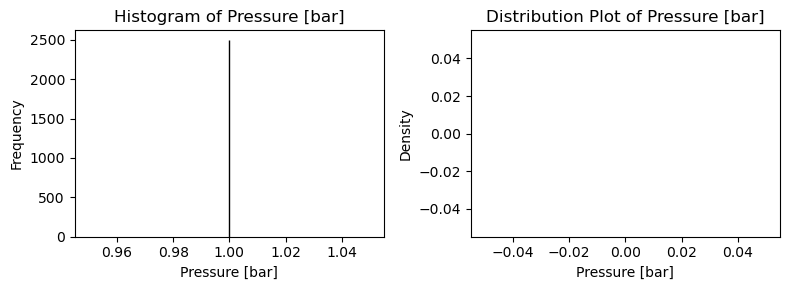

C:\Users\HP\AppData\Local\Temp\ipykernel_8488\830920527.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)
C:\Users\HP\AppData\Local\Temp\ipykernel_8488\830920527.py:28: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)


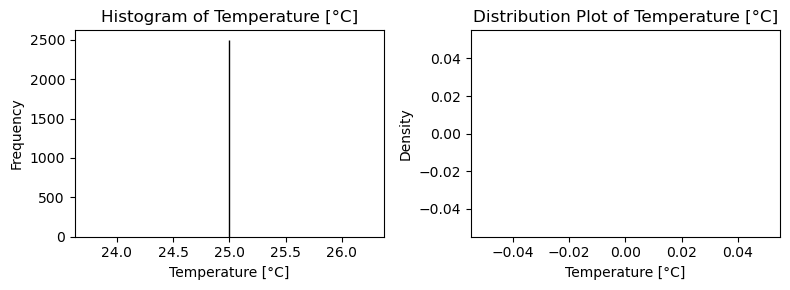

C:\Users\HP\AppData\Local\Temp\ipykernel_8488\830920527.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)
C:\Users\HP\AppData\Local\Temp\ipykernel_8488\830920527.py:28: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)


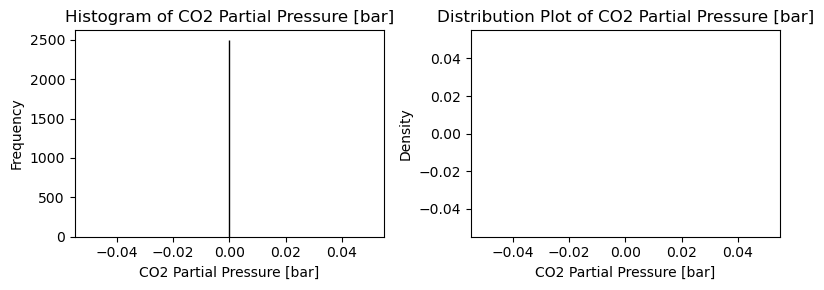

C:\Users\HP\AppData\Local\Temp\ipykernel_8488\830920527.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)


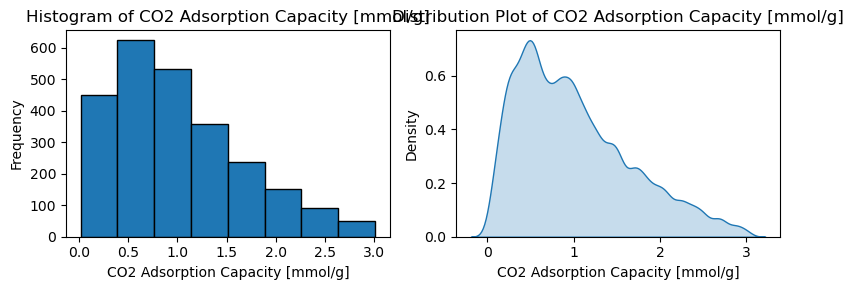

In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode non-numeric columns if needed
for column in X.columns:
    if X[column].dtype == 'object':  # If the column contains strings or non-numeric values
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])

# Generate histograms and distribution plots with dynamic bins
for column in X.columns:
    if X[column].dtype in ['int64', 'float64']:  # Process only numeric columns
        plt.figure(figsize=(8, 3))
        
        # Calculate bin edges dynamically
        column_min = X[column].min()
        column_max = X[column].max()
        bins = np.linspace(column_min, column_max, 9)  # Divide into 8 bins
        
        # Histogram
        plt.subplot(1, 2, 1)
        plt.hist(X[column], bins=bins, edgecolor='k')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
        # Distribution plot
        plt.subplot(1, 2, 2)
        sns.kdeplot(X[column], shade=True, bw_adjust=0.5)
        plt.title(f'Distribution Plot of {column}')
        plt.xlabel(column)
        
        plt.tight_layout()
        plt.show()


## 4. Correlation Matrices

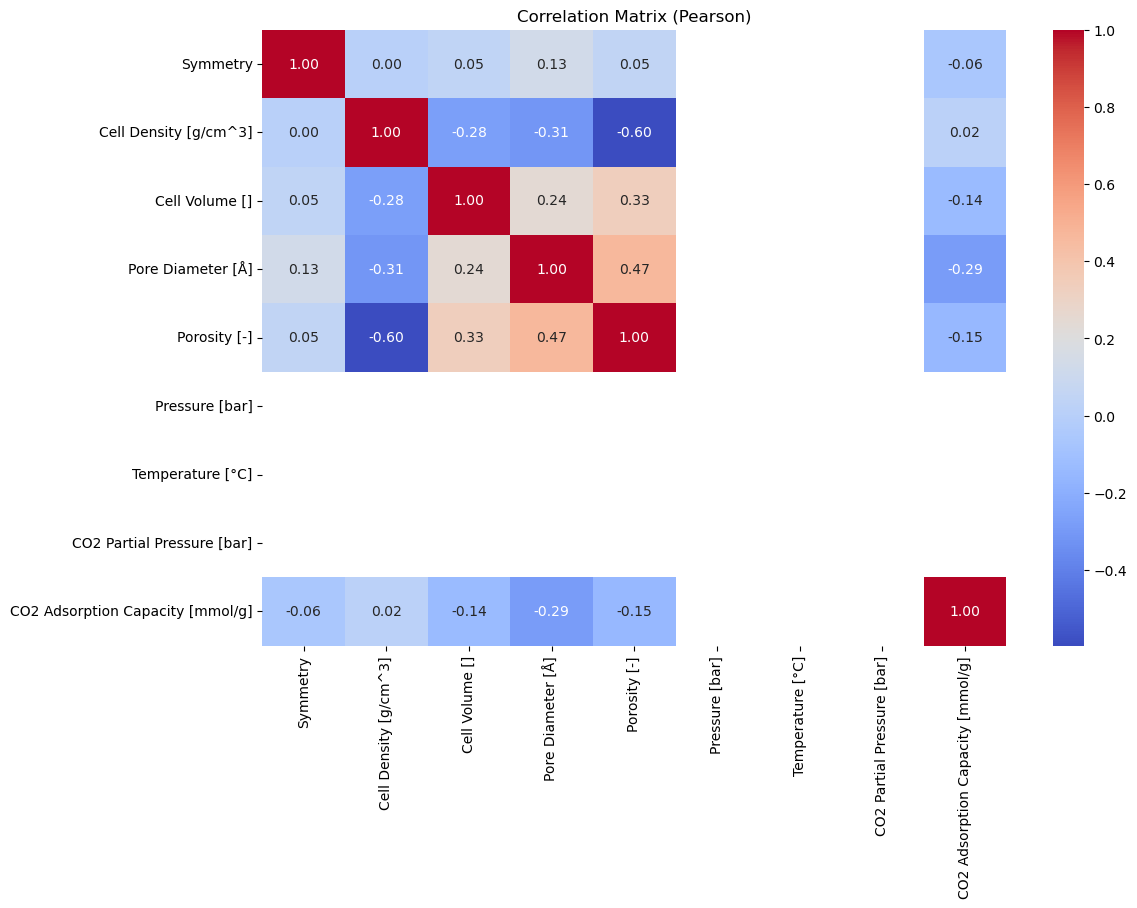

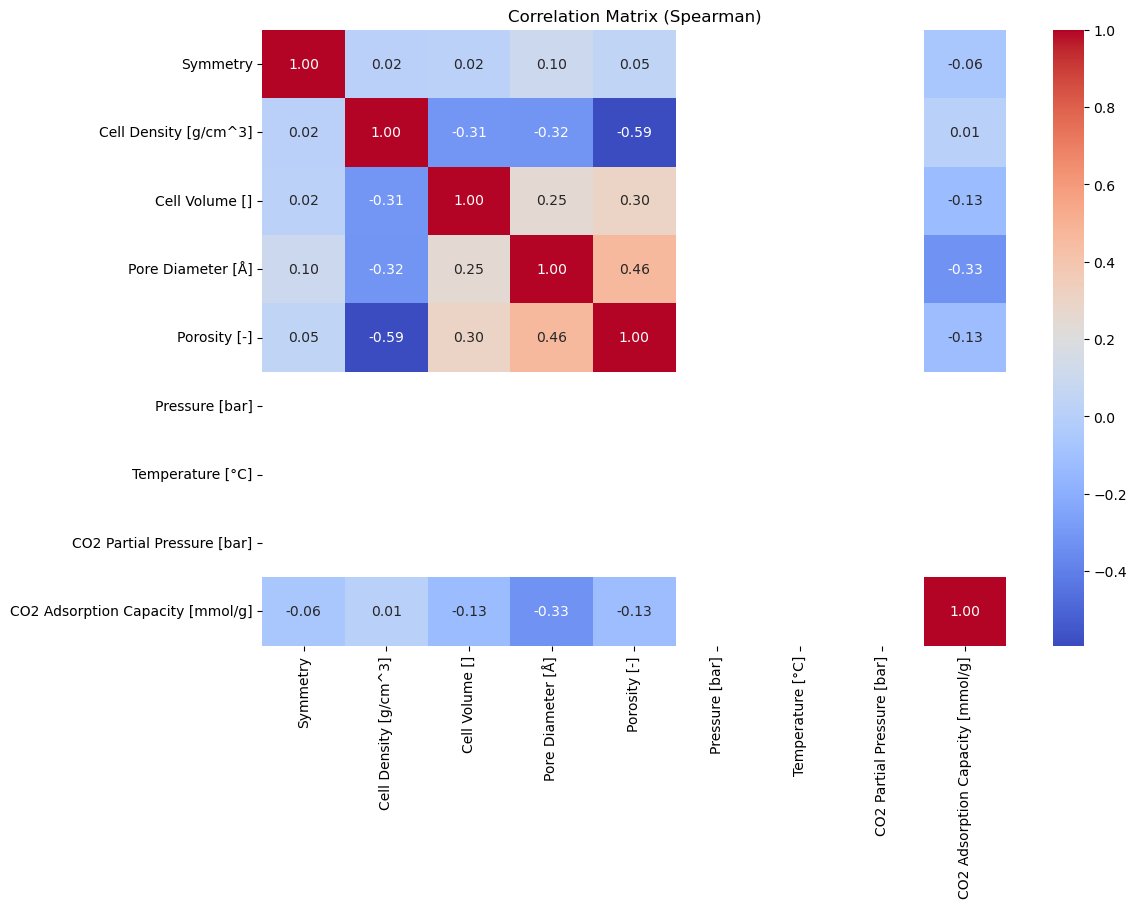

In [7]:
data_no_outliers = X
# Compute and display correlation matrices
correlation_matrix_pearson = data_no_outliers.corr(method='pearson')
correlation_matrix_spearman = data_no_outliers.corr(method='spearman')

# Pearson correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_pearson, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Pearson)')
plt.show()

# Spearman correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Spearman)')
plt.show()


Constant or near-constant columns: ['Pressure [bar]', 'Temperature [°C]', 'CO2 Partial Pressure [bar]']


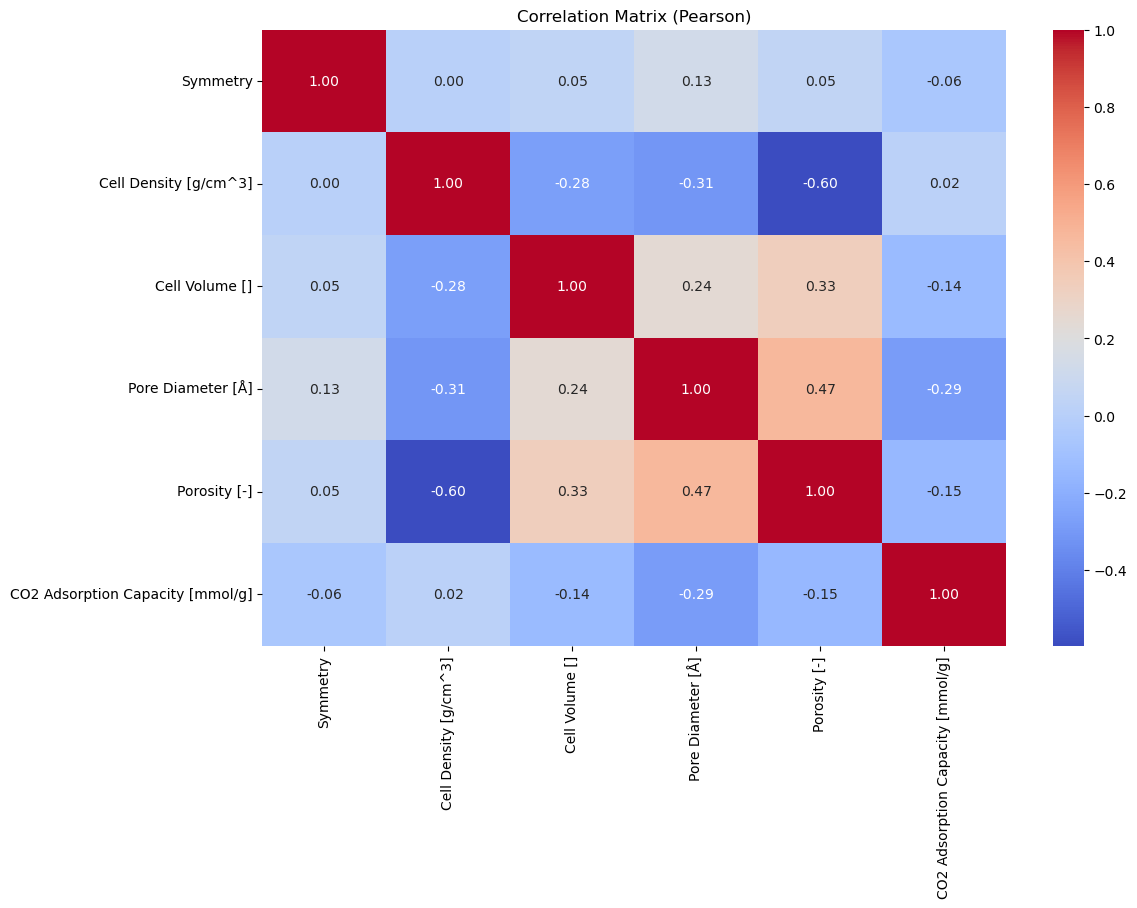

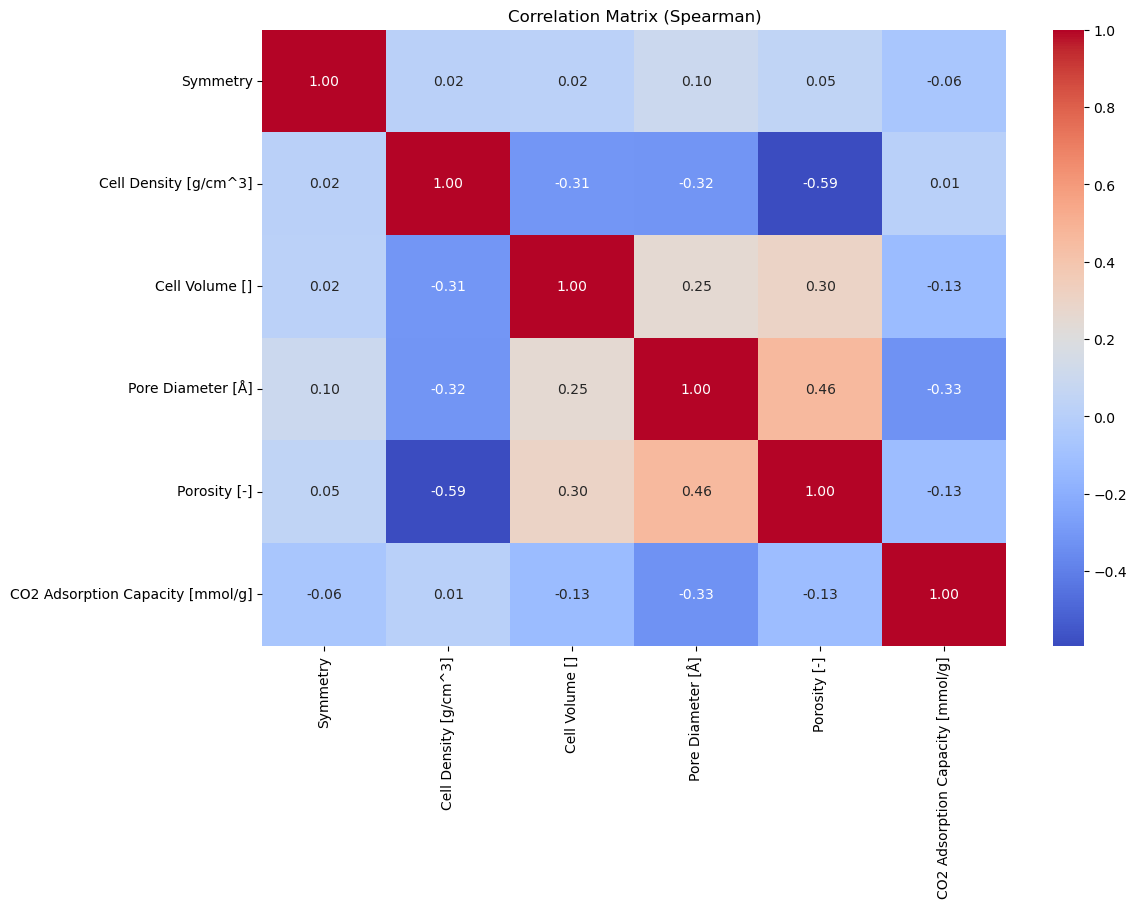

In [8]:
# Identify constant or near-constant columns
constant_columns = [col for col in X.columns if X[col].nunique() <= 1]
print(f"Constant or near-constant columns: {constant_columns}")

# Remove constant columns
X_cleaned = X.drop(columns=constant_columns)

# Recalculate the correlation matrices
correlation_matrix_pearson = X_cleaned.corr(method='pearson')
correlation_matrix_spearman = X_cleaned.corr(method='spearman')

# Plot the updated correlation matrices
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_pearson, annot=True, fmt='.2f', cmap='coolwarm', mask=correlation_matrix_pearson.isnull())
plt.title('Correlation Matrix (Pearson)')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, fmt='.2f', cmap='coolwarm', mask=correlation_matrix_spearman.isnull())
plt.title('Correlation Matrix (Spearman)')
plt.show()


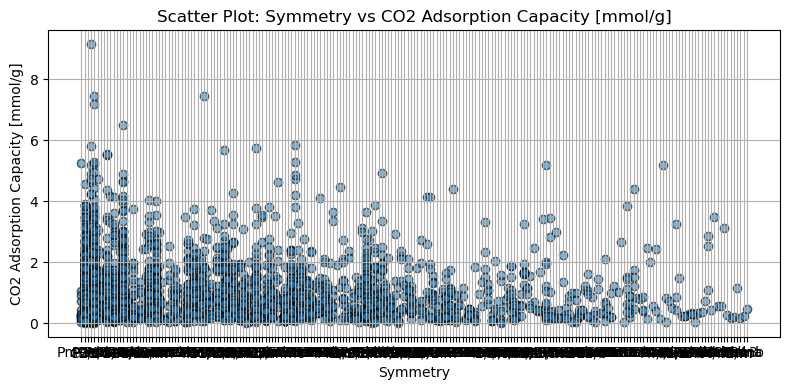

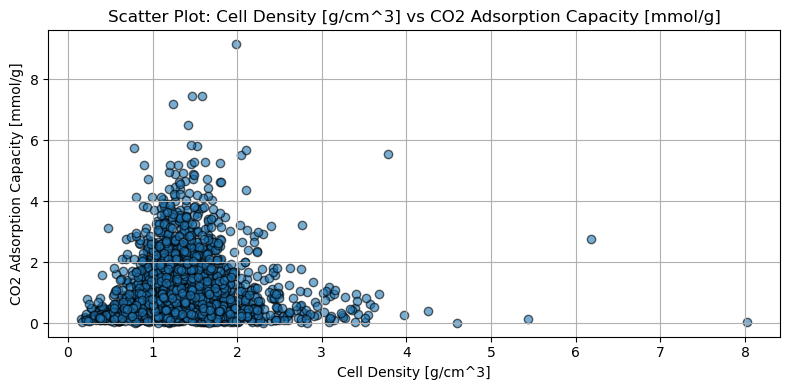

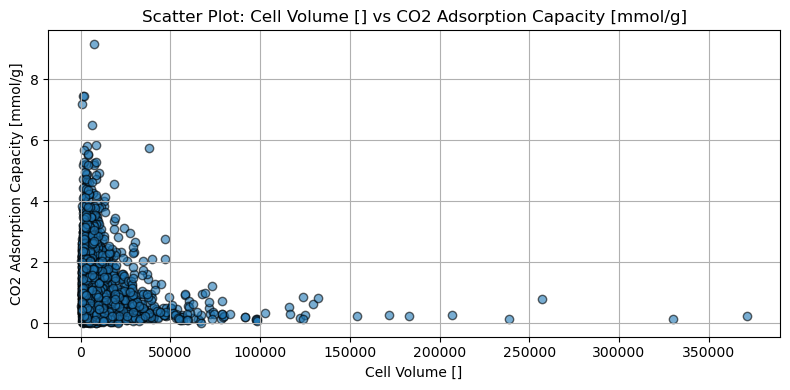

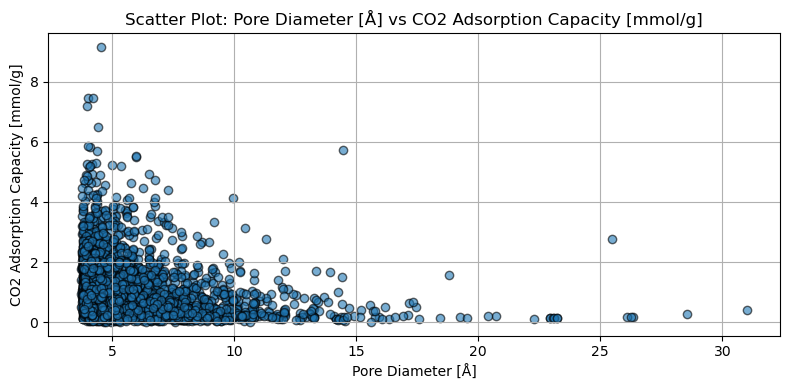

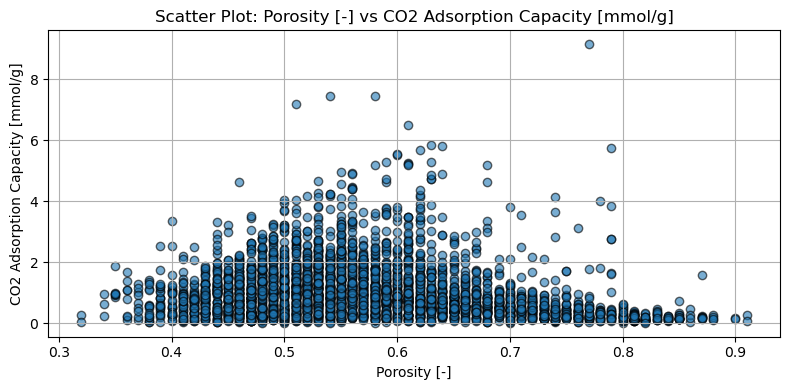

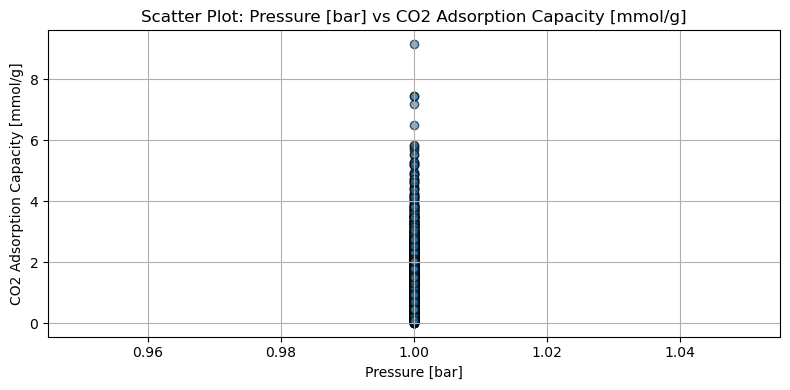

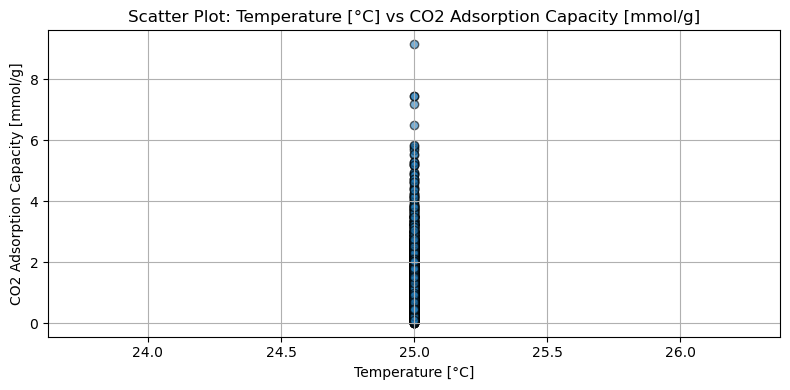

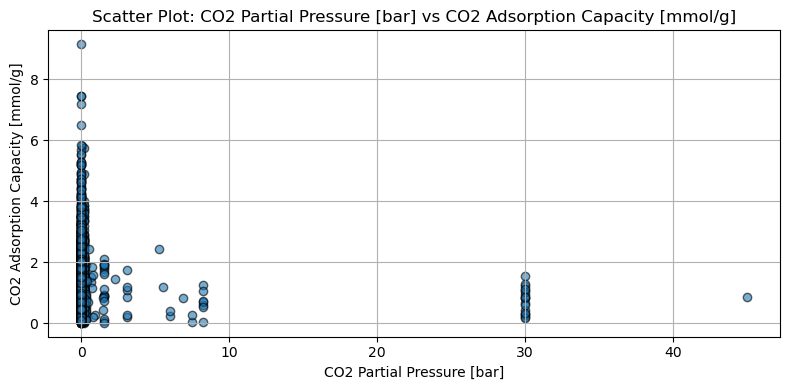

In [13]:
# Generate scatter plots for each feature against CO2 Adsorption Capacity
target_column = 'CO2 Adsorption Capacity [mmol/g]'

for column in X.columns:
    if column != target_column:  # Exclude the target column from the x-axis
        plt.figure(figsize=(8, 4))
        plt.scatter(X[column], y, alpha=0.6, edgecolor='k')
        plt.title(f'Scatter Plot: {column} vs {target_column}')
        plt.xlabel(column)
        plt.ylabel(target_column)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


### Model Building

In [10]:
data_filtered.head(5)

,Symmetry,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar],CO2 Adsorption Capacity [mmol/g]
0,Pm-3m,1.85,3640.89,6.80,0.64,1,25,0.15,0.727365
1,C2/c,1.27,10127.90,4.62,0.55,1,25,0.15,0.672152
2,Pccn,1.44,4703.28,3.88,0.56,1,25,0.15,1.041453
3,Pccn,1.28,3191.38,6.10,0.51,1,25,0.15,0.391099
4,P21/c,2.82,3885.79,6.02,0.55,1,25,0.15,0.275758


In [11]:
y = data_filtered['CO2 Adsorption Capacity [mmol/g]']
X = data_filtered.drop(columns = ['CO2 Adsorption Capacity [mmol/g]'])

In [12]:
X.head(5)

,Symmetry,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar]
0,Pm-3m,1.85,3640.89,6.80,0.64,1,25,0.15
1,C2/c,1.27,10127.90,4.62,0.55,1,25,0.15
2,Pccn,1.44,4703.28,3.88,0.56,1,25,0.15
3,Pccn,1.28,3191.38,6.10,0.51,1,25,0.15
4,P21/c,2.82,3885.79,6.02,0.55,1,25,0.15


In [16]:
y.head(5)

0    0.727365
1    0.672152
2    1.041453
3    0.391099
4    0.275758
Name: CO2 Adsorption Capacity [mmol/g], dtype: float64

24/24 [==============================] - 0s 2ms/step


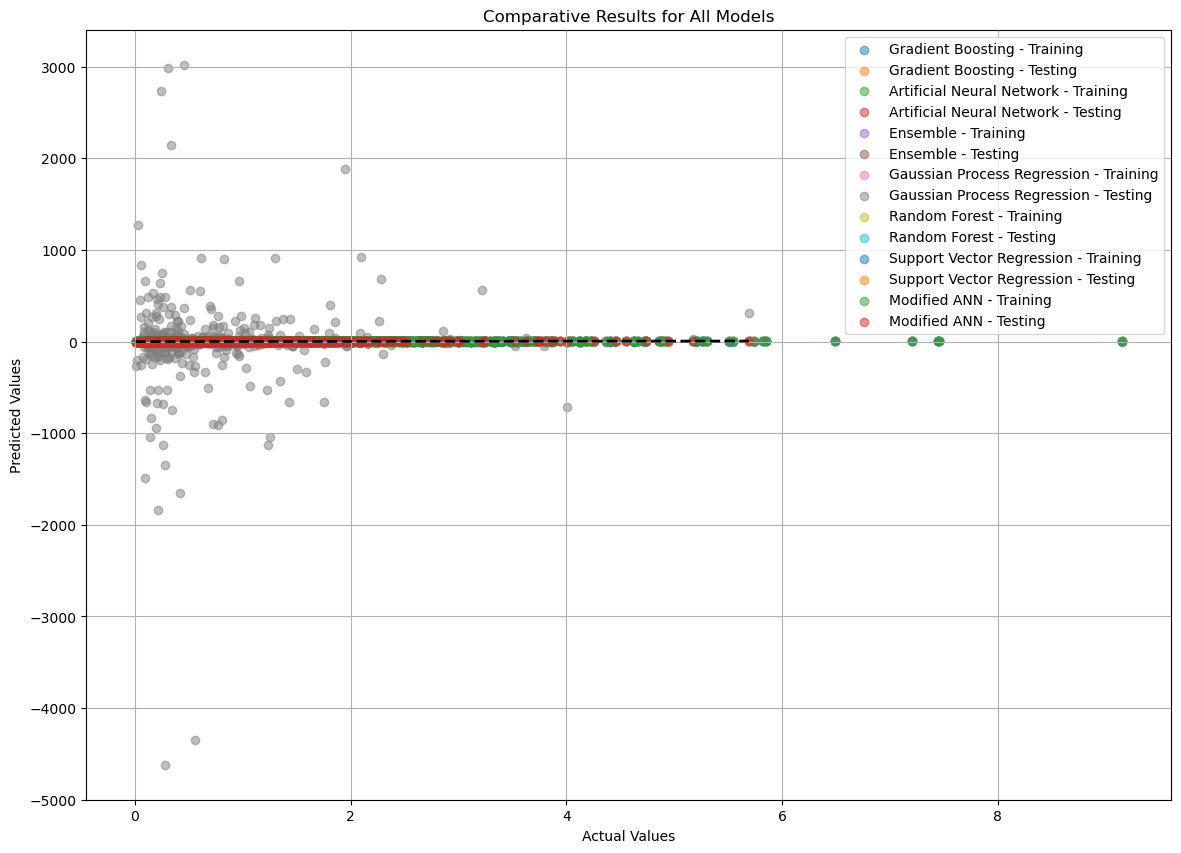

Model: Gradient Boosting
Training MSE: 0.5114
Training MAE: 0.4938
Training R2: 0.3684
Testing MSE: 0.5407
Testing MAE: 0.5224
Testing R2: 0.2206
----------------------------------------
Model: Artificial Neural Network
Training MSE: 0.5121
Training MAE: 0.4846
Training R2: 0.3676
Testing MSE: 0.5852
Testing MAE: 0.5469
Testing R2: 0.1565
----------------------------------------
Model: Ensemble
Training MSE: 0.4889
Training MAE: 0.4749
Training R2: 0.3963
Testing MSE: 0.5339
Testing MAE: 0.5193
Testing R2: 0.2303
----------------------------------------
Model: Gaussian Process Regression
Training MSE: 0.0292
Training MAE: 0.0604
Training R2: 0.9639
Testing MSE: 149015.4829
Testing MAE: 115.8680
Testing R2: -214809.4664
----------------------------------------
Model: Random Forest
Training MSE: 0.0850
Training MAE: 0.1922
Training R2: 0.8951
Testing MSE: 0.5137
Testing MAE: 0.5032
Testing R2: 0.2594
----------------------------------------
Model: Support Vector Regression
Training MSE: 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# Encode the categorical feature 'Symmetry'
le = LabelEncoder()
X['Symmetry'] = le.fit_transform(X['Symmetry'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Store results for comparison
results = {}

# 1. Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)
y_pred_train_gb = gb_model.predict(X_train_scaled)
y_pred_test_gb = gb_model.predict(X_test_scaled)

results['Gradient Boosting'] = (y_pred_train_gb, y_pred_test_gb)

# 2. Artificial Neural Network (ANN)
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
ann_model.compile(optimizer='adam', loss='mse')
ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=0)
y_pred_train_ann = ann_model.predict(X_train_scaled).flatten()
y_pred_test_ann = ann_model.predict(X_test_scaled).flatten()

results['Artificial Neural Network'] = (y_pred_train_ann, y_pred_test_ann)

# 3. Ensemble (using Gradient Boosting and Random Forest)
ensemble_preds_train = (y_pred_train_gb + y_pred_train_ann) / 2
ensemble_preds_test = (y_pred_test_gb + y_pred_test_ann) / 2
results['Ensemble'] = (ensemble_preds_train, ensemble_preds_test)

# 4. Gaussian Process Regression
gp_model = GaussianProcessRegressor()
gp_model.fit(X_train_scaled, y_train)
y_pred_train_gp = gp_model.predict(X_train_scaled)
y_pred_test_gp = gp_model.predict(X_test_scaled)

results['Gaussian Process Regression'] = (y_pred_train_gp, y_pred_test_gp)

# 5. Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
y_pred_train_rf = rf_model.predict(X_train_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

results['Random Forest'] = (y_pred_train_rf, y_pred_test_rf)

# 6. Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_train_svr = svr_model.predict(X_train_scaled)
y_pred_test_svr = svr_model.predict(X_test_scaled)

results['Support Vector Regression'] = (y_pred_train_svr, y_pred_test_svr)

# 7. Modified ANN (adding dropout for regularization)
from tensorflow.keras.layers import Dropout

modified_ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])
modified_ann_model.compile(optimizer='adam', loss='mse')
modified_ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=0)
y_pred_train_mod_ann = modified_ann_model.predict(X_train_scaled).flatten()
y_pred_test_mod_ann = modified_ann_model.predict(X_test_scaled).flatten()

results['Modified ANN'] = (y_pred_train_mod_ann, y_pred_test_mod_ann)

# Evaluate and Plot Comparative Results
def plot_comparative_results(models_results, y_train, y_test):
    plt.figure(figsize=(14, 10))
    for model_name, (y_pred_train, y_pred_test) in models_results.items():
        # Training vs Actual
        plt.scatter(y_train, y_pred_train, label=f'{model_name} - Training', alpha=0.5)
        # Testing vs Actual
        plt.scatter(y_test, y_pred_test, label=f'{model_name} - Testing', alpha=0.5)
    
    plt.plot([y_train.min(), y_test.max()], [y_train.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Comparative Results for All Models')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_comparative_results(results, y_train, y_test)

# Calculate and print performance metrics
def evaluate_results(models_results, y_train, y_test):
    for model_name, (y_pred_train, y_pred_test) in models_results.items():
        print(f"Model: {model_name}")
        print(f"Training MSE: {mean_squared_error(y_train, y_pred_train):.4f}")
        print(f"Training MAE: {mean_absolute_error(y_train, y_pred_train):.4f}")
        print(f"Training R2: {r2_score(y_train, y_pred_train):.4f}")
        print(f"Testing MSE: {mean_squared_error(y_test, y_pred_test):.4f}")
        print(f"Testing MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
        print(f"Testing R2: {r2_score(y_test, y_pred_test):.4f}")
        print('-' * 40)

evaluate_results(results, y_train, y_test)
